<a href="https://colab.research.google.com/github/Muyiiwaa/deep-learning-from-here/blob/master/convoltional_NN_cifar10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Image Classification Using Convolutional Neural Network (CNN)

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

In [2]:
# import the libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

from sklearn.metrics import classification_report

<h4 style="color:purple">Load the dataset</h4>

In [4]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 5s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [ ]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [45]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,5))
    plt.imshow(X[index])
    plt.xlabel(f'True object: {classes[y[index]]} ----- prediction: {classes[preds[index]]}')

In [13]:
print(classes[y_train[0]])


frog


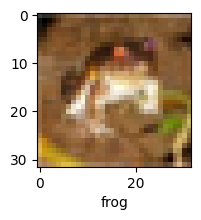

In [16]:
plot_sample(X_train, y_train, 0)

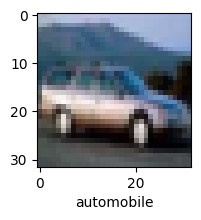

In [18]:
plot_sample(X_train, y_train, 4)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [21]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

<h4 style="color:purple">Normalizing the training data</h4>

In [20]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [22]:
ann_model = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann_model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann_model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 164s 104ms/step - loss: 1.8098 - accuracy: 0.3595
Epoch 2/5
1563/1563 [==============================] - 168s 107ms/step - loss: 1.6216 - accuracy: 0.4280
Epoch 3/5
1563/1563 [==============================] - 144s 92ms/step - loss: 1.5404 - accuracy: 0.4548
Epoch 4/5
1563/1563 [==============================] - 165s 106ms/step - loss: 1.4819 - accuracy: 0.4768
Epoch 5/5
1563/1563 [==============================] - 169s 108ms/step - loss: 1.4335 - accuracy: 0.4945


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [26]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann_model.predict(X_test)

def get_report(pred, test):
  y_pred_classes = [np.argmax(element) for element in pred]
  print("Classification Report: \n", classification_report(test, y_pred_classes))


get_report(pred = y_pred, test = y_test)

313/313 [==============================] - 8s 25ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.63      0.56      1000
           1       0.73      0.39      0.51      1000
           2       0.42      0.27      0.33      1000
           3       0.31      0.39      0.35      1000
           4       0.57      0.20      0.30      1000
           5       0.31      0.49      0.38      1000
           6       0.56      0.48      0.52      1000
           7       0.41      0.72      0.52      1000
           8       0.79      0.39      0.52      1000
           9       0.50      0.63      0.56      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.45     10000
weighted avg       0.51      0.46      0.45     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [23]:
cnn_model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [24]:
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
cnn_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.4997 - accuracy: 0.4606
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1494 - accuracy: 0.5955
Epoch 3/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.0065 - accuracy: 0.6498
Epoch 4/10
1563/1563 [==============================] - 70s 44ms/step - loss: 0.9168 - accuracy: 0.6814
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8532 - accuracy: 0.7028
Epoch 6/10
1563/1563 [==============================] - 90s 58ms/step - loss: 0.7975 - accuracy: 0.7229
Epoch 7/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.7474 - accuracy: 0.7396
Epoch 8/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7120 - accuracy: 0.7531
Epoch 9/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6715 - accuracy: 0.7662
Epoch 10/10
1563/1563 [==============================] - 56s 36m

In [27]:
cnn2_model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    # Add 3 more fully connected layers
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),

    layers.Dense(10, activation='softmax')
])

cnn2_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn2_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 34s 21ms/step - loss: 1.4324 - accuracy: 0.4863
Epoch 2/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.0825 - accuracy: 0.6228
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9565 - accuracy: 0.6668
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8721 - accuracy: 0.6976
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8060 - accuracy: 0.7203
Epoch 6/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.7473 - accuracy: 0.7417
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7001 - accuracy: 0.7576
Epoch 8/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.6543 - accuracy: 0.7718
Epoch 9/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6148 - accuracy: 0.7858
Epoch 10/10
1563/1563 [==============================] - 33s 21m

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [28]:
cnn_model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9087 - accuracy: 0.7084


[0.9086507558822632, 0.7084000110626221]

In [ ]:
y_pred = cnn_model.predict(X_test)
y_pred[:5]

In [34]:
y_pred[5]

preds = [np.argmax(num) for num in y_pred]

preds[5]

6

In [39]:
preds[12]

5

In [35]:
classes[y_test[5]]
y_test[5]

6

In [36]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

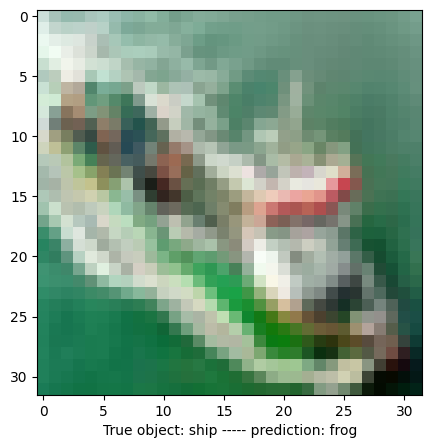

In [50]:
plot_sample(X_test, y_test,15)

In [ ]:
classes[y_classes[3]]

'ship'

In [ ]:
classes[y_classes[3]]

'ship'

<Axes: >

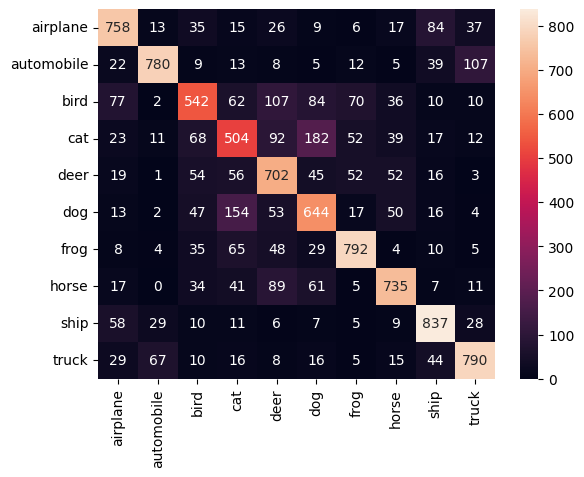

In [53]:
import pandas as pd
conf = tf.math.confusion_matrix(labels = y_test, predictions= preds)

conf_df = pd.DataFrame(data = conf, index = classes, columns = classes)

sns.heatmap(conf_df, annot = True, fmt = 'd')

<h3 style='color:purple'>Exercise</h3>